# Classes and Objects

At this point we have defined classes and created objects that represent the time of day and the day of the year.
And we've defined methods that create, modify, and perform computations with these objects.

In this chapter we'll continue our tour of object-oriented programming (OOP) by defining classes that represent geometric objects, including points, lines, rectangles, and circles.
We'll write methods that create and modify these objects, and we'll use the `jupyturtle` module to draw them.

I'll use these classes to demonstrate OOP topics including object identity and equivalence, shallow and deep copying, and polymorphism.

In [79]:
import thinkpython, diagram, jupyturtle

## Creating a Point

In computer graphics a location on the screen is often represented using a pair of coordinates in an `x`-`y` plane.
By convention, the point `(0, 0)` usually represents the upper-left corner of the screen, and  `(x, y)` represents the point `x` units to the right and `y` units down from the origin.
Compared to the Cartesian coordinate system you might have seen in a math class, the `y` axis is upside-down.

There are several ways we might represent a point in Python:

-   We can store the coordinates separately in two variables, `x` and `y`.

-   We can store the coordinates as elements in a list or tuple.

-   We can create a new type to represent points as objects.

In object-oriented programming, it would be most idiomatic to create a new type.
To do that, we'll start with a class definition for `Point`.

In [80]:
class Point:
    """Represents a point in 2-D space."""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f'Point({self.x}, {self.y})'

The `__init__` method takes the coordinates as parameters and assigns them to attributes `x` and `y`.
The `__str__` method returns a string representation of the `Point`.

Now we can instantiate and display a `Point` object like this.

In [81]:
start = Point(0, 0)
print(start)

Point(0, 0)


The following diagram shows the state of the new object. 

In [82]:
from diagram import make_frame, make_binding

d1 = vars(start)
frame = make_frame(d1, name='Point', dy=-0.25, offsetx=0.18)
binding = make_binding('start', frame)

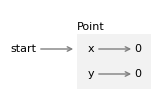

In [83]:
from diagram import diagram, adjust

width, height, x, y = [1.41, 0.89, 0.26, 0.5]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

As usual, a programmer-defined type is represented by a box with the name of the type outside and the attributes inside.

In general, programmer-defined types are mutable, so we can write a method like `translate` that takes two numbers, `dx` and `dy`, and adds them to the attributes `x` and `y`.

In [84]:
%%add_method_to Point

    def translate(self, dx, dy):
        self.x += dx
        self.y += dy

This function translates the `Point` from one location in the plane to another.
If we don't want to modify an existing `Point`, we can use `copy` to copy the original object and then modify the copy.

In [85]:
from copy import copy

end1 = copy(start)
end1.translate(300, 0)
print(end1)

Point(300, 0)


We can encapsulate those steps in another method called `translated`.

In [86]:
%%add_method_to Point

    def translated(self, dx=0, dy=0):
        point = copy(self)
        point.translate(dx, dy)
        return point

In the same way that the built in function `sort` modifies a list, and the `sorted` function creates a new list, now we have a `translate` method that modifies a `Point` and a `translated` method that creates a new one.

Here's an example:

In [87]:
end2 = start.translated(0, 150)
print(end2)

Point(0, 150)


In the next section, we'll use these points to define and draw a line.

## Creating a Line

Now let's define a class that represents the line segment between two points.
As usual, we'll start with an `__init__` method and a `__str__` method.

In [88]:
class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def __str__(self):
        return f'Line({self.p1}, {self.p2})'

With those two methods, we can instantiate and display a `Line` object we'll use to represent the `x` axis.

In [89]:
line1 = Line(start, end1)
print(line1)

Line(Point(0, 0), Point(300, 0))


When we call `print` and pass `line` as a parameter, `print` invokes `__str__` on `line`.
The `__str__` method uses an f-string to create a string representation of the `line`. 

The f-string contains two expressions in curly braces, `self.p1` and `self.p2`.
When those expressions are evaluated, the results are `Point` objects.
Then, when they are converted to strings, the `__str__` method from the `Point` class gets invoked.

That's why, when we display a `Line`, the result contains the string representations of the `Point` objects.

The following object diagram shows the state of this `Line` object.

In [90]:
from diagram import Binding, Value, Frame

d1 = vars(line1.p1)
frame1 = make_frame(d1, name='Point', dy=-0.25, offsetx=0.17)

d2 = vars(line1.p2)
frame2 = make_frame(d2, name='Point', dy=-0.25, offsetx=0.17)

binding1 = Binding(Value('start'), frame1, dx=0.4)
binding2 = Binding(Value('end'), frame2, dx=0.4)
frame3 = Frame([binding1, binding2], name='Line', dy=-0.9, offsetx=0.4, offsety=-0.25)

binding = make_binding('line1', frame3)

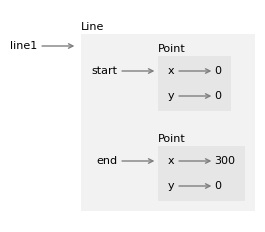

In [91]:
width, height, x, y = [2.45, 2.12, 0.27, 1.76]
ax = diagram(width, height)
bbox = binding.draw(ax, x, y)
#adjust(x, y, bbox)

String representations and object diagrams are useful for debugging, but the point of this example is to generate graphics, not text!
So we'll use the `jupyturtle` module to draw lines on the screen.

As we did in [Chapter 4](section_turtle_module), we'll use `make_turtle` to create a `Turtle` object and a small canvas where it can draw.
To draw lines, we'll use two new functions from the `jupyturtle` module:

* `jumpto`, which takes two coordinates and moves the `Turtle` to the given location without drawing a line, and 

* `moveto`, which moves the `Turtle` from its current location to the given location, and draws a line segment between them.

Here's how we import them.

In [92]:
from jupyturtle import make_turtle, jumpto, moveto

And here's a method that draws a `Line`.

In [93]:
%%add_method_to Line

    def draw(self):
        jumpto(self.p1.x, self.p1.y)
        moveto(self.p2.x, self.p2.y)

To show how it's used, I'll create a second line that represents the `y` axis.

In [94]:
line2 = Line(start, end2)
print(line2)

Line(Point(0, 0), Point(0, 150))


And then draw the axes.

In [95]:
make_turtle()
line1.draw()
line2.draw()

As we define and draw more objects, we'll use these lines again.
But first let's talk about object equivalence and identity.

## Equivalence and identity

Suppose we create two points with the same coordinates.

In [96]:
p1 = Point(200, 100)
p2 = Point(200, 100)

If we use the `==` operator to compare them, we get the default behavior for programmer-defined types -- the result is `True` only if they are the same object, which they are not.

In [97]:
p1 == p2

False

If we want to change that behavior, we can provide a special method called `__eq__` that defines what it means for two `Point` objects to be equal.

In [98]:
%%add_method_to Point

def __eq__(self, other):
    return (self.x == other.x) and (self.y == other.y)

This definition considers two `Points` to be equal if their attributes are equal.
Now when we use the `==` operator, it invokes the `__eq__` method, which indicates that `p1` and `p2` are considered equal.

In [99]:
p1 == p2

True

But the `is` operator still indicates that they are different objects.

In [100]:
p1 is p2

False

It's not possible to override the `is` operator -- it always checks whether the objects are identical.
But for programmer-defined types, you can override the `==` operator so it checks whether the objects are equivalent.
And you can define what equivalent means.

## Creating a Rectangle

Now let's define a class that represents and draws rectangles.
To keep things simple, we'll assume that the rectangles are either vertical or horizontal, not at an angle.
What attributes do you think we should use to specify the location and size of a rectangle?

There are at least two possibilities:

-   You could specify the width and height of the rectangle and the location of one corner.

-   You could specify two opposing corners.

At this point it's hard to say whether either is better than the other, so let's implement the first one.
Here is the class definition.

In [101]:
class Rectangle:
    """Represents a rectangle. 

    attributes: width, height, corner.
    """
    def __init__(self, width, height, corner):
        self.width = width
        self.height = height
        self.corner = corner
        
    def __str__(self):
        return f'Rectangle({self.width}, {self.height}, {self.corner})'

As usual, the `__init__` method assigns the parameters to attributes and the `__str__` returns a string representation of the object.
Now we can instantiate a `Rectangle` object, using a `Point` as the location of the upper-left corner.

In [102]:
corner = Point(30, 20)
box1 = Rectangle(100, 50, corner)
print(box1)

Rectangle(100, 50, Point(30, 20))


The following diagram shows the state of this object.

In [103]:
from diagram import Binding, Value

def make_rectangle_binding(name, box, **options):
    d1 = vars(box.corner)
    frame_corner = make_frame(d1, name='Point', dy=-0.25, offsetx=0.07)

    d2 = dict(width=box.width, height=box.height)
    frame = make_frame(d2, name='Rectangle', dy=-0.25, offsetx=0.45)
    binding = Binding(Value('corner'), frame1, dx=0.92, draw_value=False, **options)
    frame.bindings.append(binding)

    binding = Binding(Value(name), frame)
    return binding, frame_corner

binding_box1, frame_corner1 = make_rectangle_binding('box1', box1)

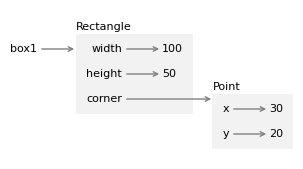

In [104]:
from diagram import Bbox

width, height, x, y = [2.83, 1.49, 0.27, 1.1]
ax = diagram(width, height)
bbox1 = binding_box1.draw(ax, x, y)
bbox2 = frame_corner1.draw(ax, x+1.85, y-0.6)
bbox = Bbox.union([bbox1, bbox2])
#adjust(x, y, bbox)

To draw a rectangle, we'll use the following method to make four `Point` objects to represent the corners.

In [105]:
%%add_method_to Rectangle

    def make_points(self):
        p1 = self.corner
        p2 = p1.translated(self.width, 0)
        p3 = p2.translated(0, self.height)
        p4 = p3.translated(-self.width, 0)
        return p1, p2, p3, p4

Then we'll make four `Line` objects to represent the sides.

In [106]:
%%add_method_to Rectangle

    def make_lines(self):
        p1, p2, p3, p4 = self.make_points()
        return Line(p1, p2), Line(p2, p3), Line(p3, p4), Line(p4, p1)

Then we'll draw the sides.

In [107]:
%%add_method_to Rectangle

    def draw(self):
        lines = self.make_lines()
        for line in lines:
            line.draw()

Here's an example.

In [108]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()

The figure includes two lines to represent the axes.

## Changing rectangles

Now let's consider two methods that modify rectangles, `grow` and `translate`.
We'll see that `grow` works as expected, but `translate` has a subtle bug.
See if you can figure it out before I explain.

`grow` takes two numbers, `dwidth` and `dheight`, and adds them to the `width` and `height` attributes of the rectangle.

In [109]:
%%add_method_to Rectangle

    def grow(self, dwidth, dheight):
        self.width += dwidth
        self.height += dheight

Here's an example that demonstrates the effect by making a copy of `box1` and invoking `grow` on the copy.

In [110]:
box2 = copy(box1)
box2.grow(60, 40)
print(box2)

Rectangle(160, 90, Point(30, 20))


If we draw `box1` and `box2`, we can confirm that `grow` works as expected.

In [111]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()
box2.draw()

Now let's see about `translate`.
It takes two numbers, `dx` and `dy`, and moves the rectangle the given distances in the `x` and `y` directions. 

In [112]:
%%add_method_to Rectangle

    def translate(self, dx, dy):
        self.corner.translate(dx, dy)

To demonstrate the effect, we'll translate `box2` to the right and down.

In [113]:
box2.translate(30, 20)
print(box2)

Rectangle(160, 90, Point(60, 40))


Now let's see what happens if we draw `box1` and `box2` again.

In [114]:
make_turtle()
line1.draw()
line2.draw()
box1.draw()
box2.draw()

It looks like both rectangles moved, which is not what we intended!
The next section explains what went wrong.

## Deep copy

When we use `copy` to duplicate `box1`, it copies the `Rectangle` object but not the `Point` object it contains.
So `box1` and `box2` are different objects, as intended.

In [115]:
box1 is box2

False

But their `corner` attributes refer to the same object.

In [116]:
box1.corner is box2.corner

True

The following diagram shows the state of these objects.

In [117]:
from diagram import Stack
from copy import deepcopy

binding_box1, frame_corner1 = make_rectangle_binding('box1', box1)
binding_box2, frame_corner2 = make_rectangle_binding('box2', box2, dy=0.4)
binding_box2.value.bindings.reverse()

stack = Stack([binding_box1, binding_box2], dy=-1.3)

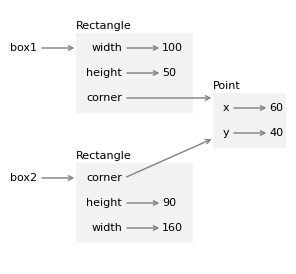

In [118]:
from diagram import Bbox

width, height, x, y = [2.76, 2.54, 0.27, 2.16]
ax = diagram(width, height)
bbox1 = stack.draw(ax, x, y)
bbox2 = frame_corner1.draw(ax, x+1.85, y-0.6)
bbox = Bbox.union([bbox1, bbox2])
# adjust(x, y, bbox)

What `copy` does is called a **shallow copy** because it copies the object but not the objects it contains.
As a result, changing the `width` or `height` of one `Rectangle` does not affect the other, but changing the attributes of the shared `Point` affects both!
This behavior is confusing and error-prone.

Fortunately, the `copy` module provides another function, called `deepcopy`, that copies not only the object but also the objects it refers to, and the objects *they* refer to, and so on. 
This operation is called a **deep copy**.

To demonstrate, let's start with a new `Rectangle` that contains a new `Point`.

In [119]:
corner = Point(20, 20)
box3 = Rectangle(100, 50, corner)
print(box3)

Rectangle(100, 50, Point(20, 20))


And we'll make a deep copy.

In [120]:
from copy import deepcopy

box4 = deepcopy(box3)

We can confirm that the two `Rectangle` objects refer to different `Point` objects.

In [121]:
box3.corner is box4.corner

False

Because `box3` and `box4` are completely separate objects, we can modify one without affecting the other.
To demonstrate, we'll move `box3` and grow `box4`.

In [122]:
box3.translate(50, 30)
box4.grow(100, 60)

And we can confirm that the effect is as expected.

In [123]:
make_turtle()
line1.draw()
line2.draw()
box3.draw()
box4.draw()

## Polymorphism

In the previous example, we invoked the `draw` method on two `Line` objects and two `Rectangle` objects.
We can do the same thing more concisely by making a list of objects.

In [124]:
shapes = [line1, line2, box3, box4]

The elements of this list are different types, but they all provide a `draw` method, so we can loop through the list and invoke `draw` on each one.

In [125]:
make_turtle()

for shape in shapes:
    shape.draw()

The first and second time through the loop, `shape` refers to a `Line` object, so when `draw` is invoked, the method that runs is the one defined in the `Line` class.

The third and fourth time through the loop, `shape` refers to a `Rectangle` object, so when `draw` is invoked, the method that runs is the one defined in the `Rectangle` class.

In a sense, each object knows how to draw itself.
This feature is called **polymorphism**.
The word comes from Greek roots that mean "many shaped".
In object-oriented programming, polymorphism is the ability of different types to provide the same methods, which makes it possible to perform many computations -- like drawing shapes -- by invoking the same method on different types of objects.

As an exercise at the end of this chapter, you'll define a new class that represents a circle and provides a `draw` method.
Then you can use polymorphism to draw lines, rectangles, and circles.

## Debugging

In this chapter, we ran into a subtle bug that happened because we created a `Point` that was shared by two `Rectangle` objects, and then we modified the `Point`.
In general, there are two ways to avoid problems like this: you can avoid sharing objects or you can avoid modifying them.

To avoid sharing objects, you can use deep copy, as we did in this chapter.

To avoid modifying objects, consider replacing impure functions like `translate` with pure functions like `translated`.
For example, here's a version of `translated` that creates a new `Point` and never modifies its attributes.

In [126]:
    def translated(self, dx=0, dy=0):
        x = self.x + dx
        y = self.y + dy
        return Point(x, y)

Python provides features that make it easier to avoid modifying objects.
They are beyond the scope of this book, but if you are curious, ask a virtual assistant, "How do I make a Python object immutable?"

Creating a new object takes more time than modifying an existing one, but the difference seldom matters in practice.
Programs that avoid shared objects and impure functions are often easier to develop, test, and debug -- and the best kind of debugging is the kind you don't have to do.

## Glossary

```{glossary}
**shallow copy**
 A copy operation that does not copy nested objects.

**deep copy**
 A copy operation that also copies nested objects.

**polymorphism**
 The ability of a method or operator to work with multiple types of objects.
```

## Exercises

In [127]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

For all of the following exercises, consider asking a virtual assistant for help.
If you do, you'll want include as part of the prompt the class definitions for `Point`, `Line`, and `Rectangle` -- otherwise the VA will make a guess about their attributes and functions, and the code it generates won't work.

### Exercise

Write an `__eq__` method for the `Line` class that returns `True` if the `Line` objects refer to `Point` objects that are equivalent, in either order.

You can use the following outline to get started.

In [128]:
%%add_method_to Line

def __eq__(self, other):
    return None

In [129]:
# Solution goes here

You can use these examples to test your code.

In [130]:
start1 = Point(0, 0)
start2 = Point(0, 0)
end = Point(200, 100)

This example should be `True` because the `Line` objects refer to `Point` objects that are equivalent, in the same order.

In [131]:
line_a = Line(start1, end)
line_b = Line(start2, end)
line_a == line_b    # should be True

This example should be `True` because the `Line` objects refer to `Point` objects that are equivalent, in reverse order.

In [132]:
line_c = Line(end, start1)
line_a == line_c     # should be True

Equivalence should always be transitive -- that is, if `line_a` and `line_b` are equivalent, and `line_a` and `line_c` are equivalent, then `line_b` and `line_c` should also be equivalent.

In [133]:
line_b == line_c     # should be True

This example should be `False` because the `Line` objects refer to `Point` objects that are not equivalent.

In [134]:
line_d = Line(start1, start2)
line_a == line_d    # should be False

### Exercise

Write a `Line` method called `midpoint` that computes the midpoint of a line segment and returns the result as a `Point` object.

You can use the following outline to get started.

In [135]:
%%add_method_to Line

    def midpoint(self):
        return Point(0, 0)

In [136]:
# Solution goes here

You can use the following examples to test your code and draw the result.

In [137]:
start = Point(0, 0)
end1 = Point(300, 0)
end2 = Point(0, 150)
line1 = Line(start, end1)
line2 = Line(start, end2)

In [138]:
mid1 = line1.midpoint()
print(mid1)

Point(0, 0)


In [139]:
mid2 = line2.midpoint()
print(mid2)

Point(0, 0)


In [140]:
line3 = Line(mid1, mid2)

In [141]:
make_turtle()

for shape in [line1, line2, line3]:
    shape.draw()

### Exercise

Write a `Rectangle` method called `midpoint` that find the point in the center of a rectangle and returns the result as a `Point` object.

You can use the following outline to get started.

In [142]:
%%add_method_to Rectangle

    def midpoint(self):
        return Point(0, 0)

In [143]:
# Solution goes here

You can use the following example to test your code.

In [144]:
corner = Point(30, 20)
rectangle = Rectangle(100, 80, corner)

In [145]:
mid = rectangle.midpoint()
print(mid)

Point(0, 0)


In [146]:
diagonal = Line(corner, mid)

In [147]:
make_turtle()

for shape in [line1, line2, rectangle, diagonal]:
    shape.draw()

### Exercise

Write a `Rectangle` method called `make_cross` that:

1. Uses `make_lines` to get a list of `Line` objects that represent the four sides of the rectangle.

2. Computes the midpoints of the four lines.

3. Makes and returns a list of two `Line` objects that represent lines connecting opposite midpoints, forming a cross through the middle of the rectangle.

You can use this outline to get started.

In [148]:
%%add_method_to Rectangle

    def make_diagonals(self):
        return []

In [149]:
# Solution goes here

You can use the following example to test your code.

In [150]:
corner = Point(30, 20)
rectangle = Rectangle(100, 80, corner)

In [151]:
### uncomment the following line to test your code

# lines = rectangle.make_cross()

In [152]:
### uncomment the following lines to draw the rectangle and its diagonals

# make_turtle()

# rectangle.draw()
# for line in lines:
#     line.draw()

### Exercise

Write a definition for a class named `Circle` with attributes `center` and `radius`, where `center` is a Point object and `radius` is a number.
Include special methods `__init__` and a `__str__`, and a method called `draw` that uses `jupyturtle` functions to draw the circle.

You can use the following function, which is a version of the `circle` function we wrote in Chapter 4.

In [153]:
from jupyturtle import make_turtle, forward, left, right
import math
    
def draw_circle(radius):
    circumference = 2 * math.pi * radius
    n = 30
    length = circumference / n
    angle = 360 / n
    left(angle / 2)
    for i in range(n):
        forward(length)
        left(angle)

In [154]:
# Solution goes here

You can use the following example to test your code.
We'll start with a square `Rectangle` with width and height `100`.

In [155]:
corner = Point(20, 20)
rectangle = Rectangle(100, 100, corner)

The following code should create a `Circle` that fits inside the square.

In [ ]:
center = rectangle.midpoint()
radius = rectangle.height / 2

circle = Circle(center, radius)
print(circle)

If everything worked correctly, the following code should draw the circle inside the square (touching on all four sides).

In [ ]:
make_turtle(delay=0.01)

rectangle.draw()
circle.draw()